In [1]:
# imp Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
# Load the Groceries dataset
groceries = pd.read_csv('groceries.csv')

In [3]:
# Preview the data
groceries.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [4]:
# Check data types and missing values
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
#Clean and Preprocess Data
# Handle missing values (if any)
groceries.fillna(groceries.mode().iloc[0], inplace=True)

In [6]:
# Convert to lowercase and remove special characters
groceries['itemDescription'] = groceries['itemDescription'].str.lower().str.replace('[^a-zA-Z0-9 ]', '')

C:\Users\Alok\AppData\Local\Temp\ipykernel_9776\5439405.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  groceries['itemDescription'] = groceries['itemDescription'].str.lower().str.replace('[^a-zA-Z0-9 ]', '')


In [7]:
# Remove duplicates
groceries = groceries.drop_duplicates()

In [8]:

groceries 

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruitvegetable juice


In [9]:
#Explore various aspects of the dataset using descriptive statistics, visualizations (e.g., bar charts, pie 
#charts, heatmaps), and association analysis (e.g., Apriori algorithm).

In [10]:
#Exploratory Data Analysis (Descriptive Statistics)
# Summary statistics
groceries.describe()


,Member_number
count,38006.000000
mean,3003.361390
std,1153.659151
min,1000.000000
25%,2001.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [11]:
# Count of unique items
print(f"Number of unique items: {groceries['itemDescription'].nunique()}")

Number of unique items: 167


In [12]:
# Most popular items
top_items = groceries['itemDescription'].value_counts().head(10)
print(f"Top 10 items:\n{top_items}")

Top 10 items:
whole milk          2363
other vegetables    1827
rollsbuns           1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: itemDescription, dtype: int64


In [13]:
# Most popular items
top_items = groceries['itemDescription'].value_counts().head(10)
print(f"Top 10 items:\n{top_items}")

Top 10 items:
whole milk          2363
other vegetables    1827
rollsbuns           1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: itemDescription, dtype: int64


In [14]:
#Visualizations

In [15]:
# Display the column names in your dataframe
print(groceries.columns)

# If "quantity" is not in the list of columns, replace it with the correct column name


Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


C:\AlokSoftware\lib\site-packages\seaborn\distributions.py:516: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = self.ax.fill_between([], [], color=color, **plot_kws)


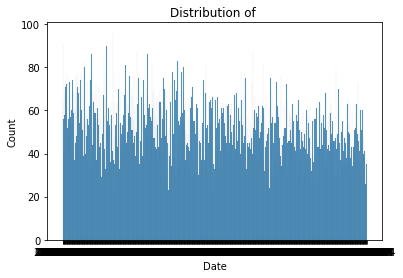

In [17]:
# Distribution of purchase counts
sns.histplot(data=groceries, x='Date')
plt.xlabel('Date')
plt.title('Distribution of ')
plt.show()


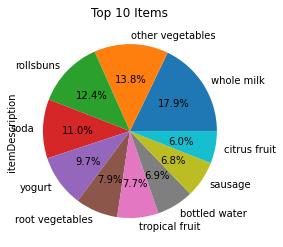

In [18]:
# Pie chart of top items
top_items.plot.pie(autopct='%1.1f%%', labels=top_items.index)
plt.title('Top 10 Items')
plt.show()

In [19]:
# Apriori algorithm).
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset (replace 'dataset.csv' with the actual file path)
groceries = pd.read_csv('groceries.csv')

# Perform any necessary data cleaning and preprocessing

# Convert the dataset into a binary format
# One-hot encode the items in the dataset
groceries_encoded = pd.get_dummies(groceries)

# Replace any non-binary values with 0 or 1
groceries_encoded[groceries_encoded > 1] = 1

# Apply the Apriori algorithm
itemsets = apriori(groceries_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(itemsets, metric="lift", min_threshold=1.1)

# Display the association rules
print(rules)


C:\AlokSoftware\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [20]:
#Analyze sales trends, identify patterns and correlations between products 
######pandas   and seaborn 

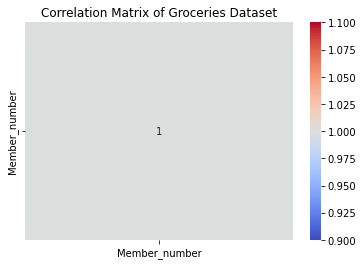

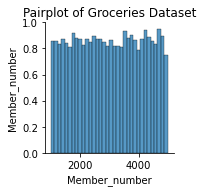

In [21]:
#  (5)Analyze sales trends, identify patterns and correlations between products 
######pandas   and seaborn 
import seaborn as sns
import pandas as pd

# Load the Groceries Dataset
groceries = pd.read_csv('groceries.csv')

# Calculate the correlation matrix between numerical variables
corr_matrix = groceries.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Groceries Dataset')
plt.show()

# Plot the pairplot of the dataset
sns.pairplot(groceries)
plt.title('Pairplot of Groceries Dataset')
plt.show()

In [22]:
# Display top rules indicating items frequently purchased together
display(rules.head(10))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [53]:
##(6)Utilize Python libraries such as Pandas, Matplotlib, Seaborn, and MLxtend for data manipulation, 
###visualization and association rule mining.


# Step 1: Data Loading and Exploration
# Load the dataset
groceries_df = pd.read_csv('groceries.csv')

# Display the first few rows of the dataset
print(groceries_df.head())

# Get summary statistics of the dataset
print(groceries_df.describe())

# Step 2: Data Preprocessing
# Check for missing values and handle them if necessary
print(groceries_df.isnull().sum())



    
# Step 4: Association Rule Mining
# Perform one-hot encoding for association rule mining

# Run the Apriori algorithm
itemsets = apriori(groceries_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(itemsets, metric="lift", min_threshold=1.1)






   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
       Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000
Member_number      0
Date               0
itemDescription    0
dtype: int64


C:\AlokSoftware\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 1808